<a href="https://colab.research.google.com/github/mnocerino23/Learning-NLP/blob/main/FeatureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

data = pd.read_csv("SMSSpamCollection.tsv", sep = '\t')
data.columns = ['label', 'body_text']

#For feature engineering we will use the raw text

Hypothesis: spam messages are longer than real features.
# Create a feature to record length of the text message

In [3]:
#take length of the text and subtract white spaces
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))

In [4]:
data.head(5)

,label,body_text,body_len
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
1,ham,"Nah I don't think he goes to usf, he lives aro...",49
2,ham,Even my brother is not like to speak with me. ...,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135


# Create feature for % of text that is punctuation

In [5]:
import string

def count_punct(text):
  count = sum([1 for char in text if char in string.punctuation])
  #divide count of punctuation by the number of non
  # white space characters in the text
  #multiply by 100 so that we get a percentage and not a decimal
  return round(count/(len(text) - text.count(" ")), 3)*100

In [6]:
data['punct_percent'] = data['body_text'].apply(lambda x: count_punct(x))

In [7]:
data.head(5)

,label,body_text,body_len,punct_percent
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
2,ham,Even my brother is not like to speak with me. ...,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.4


# Now, let's evaluate our created features to see if they are helpful

In [8]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

Create two histograms
- we should use normed = True parameter for both plots but for some reason it's causing an error

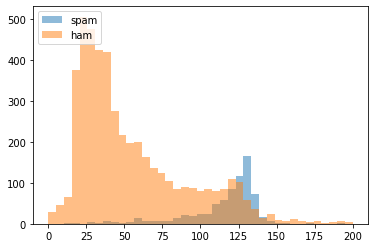

In [9]:
#plot body length column of message with label = spam
bins = np.linspace(0, 200, 40)

pyplot.hist(data[data['label'] == 'spam']['body_len'], bins, alpha = 0.5, label = 'spam')
pyplot.hist(data[data['label'] == 'ham']['body_len'], bins, alpha = 0.5, label = 'ham')
pyplot.legend(loc = 'upper left')
pyplot.show()

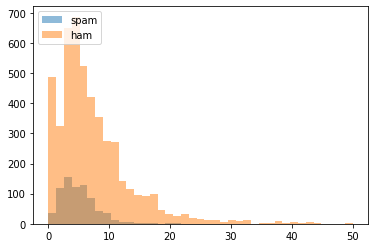

In [10]:
bins = np.linspace(0, 50, 40)

pyplot.hist(data[data['label'] == 'spam']['punct_percent'], bins, alpha = 0.5, label = 'spam')
pyplot.hist(data[data['label'] == 'ham']['punct_percent'], bins, alpha = 0.5, label = 'ham')
pyplot.legend(loc = 'upper left')
pyplot.show()

# Based on our graphs, our hypothesis that spam messages are longer than real messages seems to be correct based on our graphs. The punctuation percentage feature is less relevant to our model.

In [11]:
#now look at full distributions for engineered features
#we would transform if the feature distribution has a problematic 
#skew or many outliers

We see a bimodal distribution when we draw the histogram for message length. Not a great candidate for transformation

Text(0.5, 1.0, 'Text Message Length Distribution')

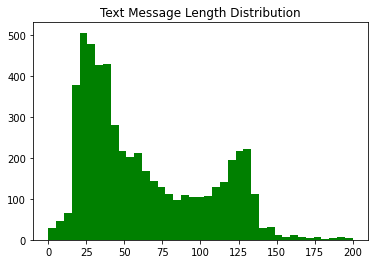

In [12]:
bins = np.linspace(0,200, 40)

pyplot.hist(data['body_len'], bins, color = "green")
pyplot.title("Text Message Length Distribution")

The punctpercent graph is fairly skewed and can take on a wide range of values so we should consider transforming this data.

Text(0.5, 1.0, 'Punctuation Percent Distribution')

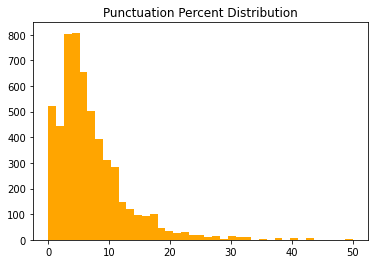

In [13]:
bins = np.linspace(0,50, 40)

pyplot.hist(data['punct_percent'], bins, color = "orange")
pyplot.title("Punctuation Percent Distribution")

# Applying the transformation to punct_percent:

transformations - alter each data point in a certain column in a systematic way (e.g. x^2, sqrt(x), log(x))

# Box- Cox Power Transformations
Basic form: y^x where y is the value in an individual cell and x is the exponent of the power transformation we choose

In practice:
- determine range of exponents you want to test out
- apply each transformation to each value of your chosen feature
- do some analysis to determine which of the transformations yielded the best distrubution (plot and see which is most like normal distribution)

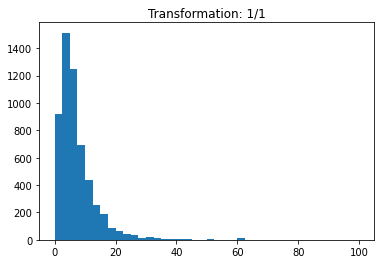

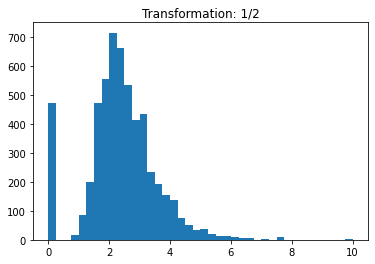

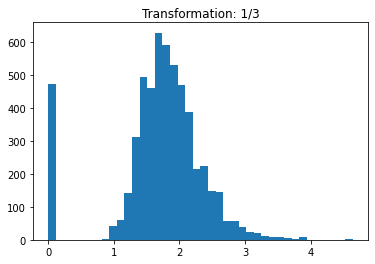

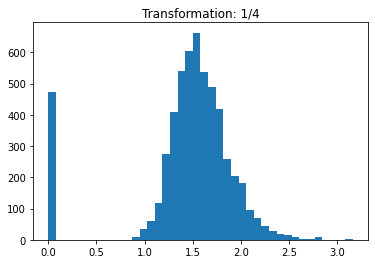

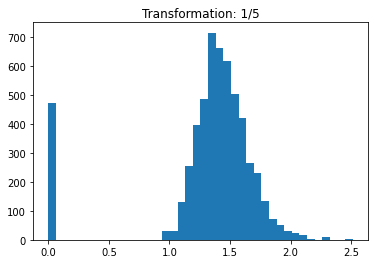

In [18]:
#given the charts, we choose power of 1/4 or 1/5 because these pull in 
#the tails of the distribution and make them more normal.
#note the bar with 0 punct percentage will not be affected behind
#a power transformation
for i in [1,2,3,4,5]:
  pyplot.hist(data['punct_percent']** (1/i), bins = 40)
  pyplot.title("Transformation: 1/{}".format(str(i)))
  pyplot.show()